In [ ]:
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:

data = pd.read_csv('combine.csv')
data.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,hour+minute,hour,minute,second,Number of announcements,Number of withdrawals,Number of announced NLRI prefixes,Number of withdrawn NLRI prefixes,Average AS-path length,Maximum AS-path length,Average unique AS-path length,Number of duplicate announcements,Number of duplicate withdrawals,Number of implicit withdrawals,Average edit distance,Maximum edit distance,Inter-arrival time,Maximum edit distance = 7,Maximum edit distance = 8,Maximum edit distance = 9,Maximum edit distance = 10,Maximum edit distance = 11,Maximum edit distance = 12,Maximum edit distance = 13,Maximum edit distance = 14,Maximum edit distance = 15,Maximum edit distance = 16,Maximum edit distance = 17,Maximum AS-path length = 7,Maximum AS-path length = 8,Maximum AS-path length = 9,Maximum AS-path length = 10,Maximum AS-path length = 11,Maximum AS-path length = 12,Maximum AS-path length = 13,Maximum AS-path length = 14,Maximum AS-path length = 15,Number of Interior Gateway Protocol (IGP) packets,Number of Exterior Gateway Protocol (EGP) packets,Number of incomplete packets,Packet size (B),Label
0,0,0.0,0.0,0.0,57.0,8.0,203.0,16.0,6.0,15.0,6.0,206.0,150.0,20.0,6.0,100.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,0.0,0.0,8079.0,-1.0
1,1,0.0,1.0,0.0,62.0,23.0,361.0,75.0,6.0,16.0,6.0,398.0,355.0,120.0,6.0,1.1,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0,0.0,0.0,9515.0,-1.0
2,2,0.0,2.0,0.0,74.0,12.0,398.0,23.0,6.0,12.0,6.0,433.0,323.0,28.0,7.0,1.2,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,0.0,0.0,8632.0,-1.0
3,3,0.0,3.0,0.0,70.0,4.0,543.0,49.0,6.0,27.0,6.0,568.0,210.0,72.0,8.0,1.1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72.0,0.0,0.0,9227.0,-1.0
4,4,0.0,4.0,0.0,51.0,4.0,347.0,4.0,5.0,8.0,5.0,439.0,263.0,5.0,6.0,0.8,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,7831.0,-1.0


In [ ]:
data.columns

Index(['hour+minute', 'hour', 'minute', 'second', 'Number of announcements',
       'Number of withdrawals', 'Number of announced NLRI prefixes',
       'Number of withdrawn NLRI prefixes', 'Average AS-path length',
       'Maximum AS-path length', 'Average unique AS-path length',
       'Number of duplicate announcements', 'Number of duplicate withdrawals',
       'Number of implicit withdrawals', 'Average edit distance',
       'Maximum edit distance', 'Inter-arrival time',
       'Maximum edit distance = 7', 'Maximum edit distance = 8',
       'Maximum edit distance = 9', 'Maximum edit distance = 10',
       'Maximum edit distance = 11', 'Maximum edit distance = 12',
       'Maximum edit distance = 13', 'Maximum edit distance = 14',
       'Maximum edit distance = 15', 'Maximum edit distance = 16',
       'Maximum edit distance = 17', 'Maximum AS-path length = 7',
       'Maximum AS-path length = 8', 'Maximum AS-path length = 9',
       'Maximum AS-path length = 10', 'Maximum AS-pat

In [ ]:
print(data.groupby('Label').size())

Label
-1.0    28120
 1.0     4965
dtype: int64


In [ ]:
data['Label'] = data['Label'].apply(lambda x: 0 if x == -1 else 1)

In [ ]:
data['Label']

0        0
1        0
2        0
3        0
4        0
        ..
33081    0
33082    0
33083    0
33084    0
33085    1
Name: Label, Length: 33086, dtype: int64

In [ ]:
data.shape

(33086, 42)

In [ ]:
data.dtypes

hour+minute                                           object
hour                                                 float64
minute                                               float64
second                                               float64
Number of announcements                              float64
Number of withdrawals                                float64
Number of announced NLRI prefixes                    float64
Number of withdrawn NLRI prefixes                    float64
Average AS-path length                               float64
Maximum AS-path length                               float64
Average unique AS-path length                        float64
Number of duplicate announcements                    float64
Number of duplicate withdrawals                      float64
Number of implicit withdrawals                       float64
Average edit distance                                float64
Maximum edit distance                                float64
Inter-arrival time      

In [ ]:
data=data.drop('hour+minute',axis=1)

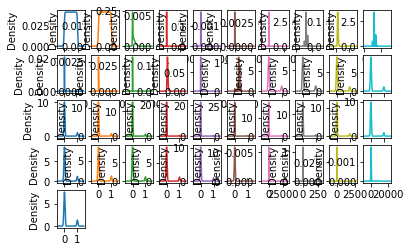

In [ ]:
data.plot(kind='density', subplots=True, layout=(5,10), sharex=False, legend=False, fontsize=10)
plt.show()

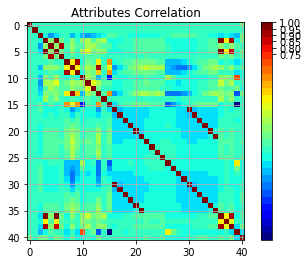

In [ ]:
from matplotlib import cm as cm

fig = plt.figure()
ax1 = fig.add_subplot(111)
cmap = cm.get_cmap('jet', 30)
cax = ax1.imshow(data.corr(), interpolation="none", cmap=cmap)
ax1.grid(True)
plt.title('Attributes Correlation')
fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
plt.show()

In [ ]:
Y = data['Label'].values
X = data.drop('Label', axis=1).values

In [ ]:
Y = np.reshape(Y,(33086,1))
Y.shape

(33086, 1)

In [ ]:
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

In [ ]:
rescaledX = np.reshape(rescaledX,(33086,40,1))

In [ ]:
rescaledX.shape

(33086, 40, 1)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(rescaledX,Y,test_size=0.20,random_state=21)

In [ ]:
y_train

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [1]])

In [ ]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape =(40,1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1,activation='sigmoid'))

regressor.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics=['accuracy'])

regressor.fit(x_train, y_train, epochs = 15, batch_size = 30, verbose=1, validation_split=0.2)

Epoch 1/15
706/706 [==============================] - 10s 14ms/step - loss: 0.4341 - accuracy: 0.8448 - val_loss: nan - val_accuracy: 0.8561
Epoch 2/15
706/706 [==============================] - 9s 13ms/step - loss: 0.4293 - accuracy: 0.8458 - val_loss: nan - val_accuracy: 0.8561
Epoch 3/15
706/706 [==============================] - 9s 12ms/step - loss: 0.4325 - accuracy: 0.8458 - val_loss: nan - val_accuracy: 0.8561
Epoch 4/15
706/706 [==============================] - 9s 12ms/step - loss: 0.4317 - accuracy: 0.8458 - val_loss: nan - val_accuracy: 0.8561
Epoch 5/15
706/706 [==============================] - 9s 13ms/step - loss: 0.4315 - accuracy: 0.8458 - val_loss: nan - val_accuracy: 0.8561
Epoch 6/15
706/706 [==============================] - 9s 12ms/step - loss: 0.4250 - accuracy: 0.8458 - val_loss: nan - val_accuracy: 0.8561
Epoch 7/15
706/706 [==============================] - 9s 13ms/step - loss: 0.3781 - accuracy: 0.8458 - val_loss: nan - val_accuracy: 0.8561
Epoch 8/15
706/706 

In [ ]:
 y_pred=regressor.predict(x_test)
 y_pred = np.reshape(y_pred,(6618))
 y_pred=list(y_pred)

In [ ]:
for i,val in zip(range(6618),y_pred):
  if val>=0.5:
    y_pred[i]=1
  else:
    y_pred[i]=0

In [ ]:
train_acc = regressor.evaluate(x_train, y_train, verbose=0)
test_acc = regressor.evaluate(x_test, y_test, verbose=0)

In [ ]:
print(train_acc)
print(test_acc)

[nan, 0.8478540182113647]
[0.34345415234565735, 0.8581142425537109]


In [ ]:
matrix = confusion_matrix(y_test, y_pred)

In [ ]:
matrix

array([[5679,    0],
       [ 939,    0]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.86      1.00      0.92      5679
           1       0.00      0.00      0.00       939

    accuracy                           0.86      6618
   macro avg       0.43      0.50      0.46      6618
weighted avg       0.74      0.86      0.79      6618



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
